In [ ]:
# All info you can see here.
# https://github.com/VProv/DLSchoolNLP_Visualization

In [1]:
import torch

In [2]:
torch.__version__

'0.4.1'

In [33]:
!python --version

Python 3.6.6


In [173]:
#!pip install torchnet

In [174]:
#В новом терминале python -m visdom.server -port 8097 &
# Выключить lsof -ti:8097 | xargs kill -9

In [3]:
import visdom
import numpy as np

**VISDOM - A flexible tool from facebook research for creating, organizing, and sharing visualizations of live, rich data. Supports Torch and Numpy. https://github.com/facebookresearch/visdom#usage**

In [4]:
vis = visdom.Visdom()
vis.text('Hello, world!')

'window_36b744cf5b2aaa'

### Basics
### Visdom offers the following basic visualization functions:

**1) vis.image : image**

**2) vis.images : list of images**

**3) vis.text : arbitrary HTML**

**4) vis.properties : properties grid**

**5) vis.audio : audio**

**6) vis.video : videos**

**7) vis.svg : SVG object**

**8) vis.matplot : matplotlib plot**

**9) vis.save : serialize state server-side**

### Plotting
### We have wrapped several common plot types to make creating basic visualizations easily. These visualizations are powered by Plotly.

### The following API is currently supported:

**vis.scatter : 2D or 3D scatter plots** \newline

**vis.line : line plots**

**vis.stem : stem plots**

**vis.heatmap : heatmap plots**

**vis.bar : bar graphs**

**vis.histogram : histograms**

**vis.boxplot : boxplots**

**vis.surf : surface plots**

**vis.contour : contour plots**

**vis.quiver : quiver plots**

**vis.mesh : mesh plots**

**Visdom allows to use https://plot.ly/python/**

In [5]:
vis = visdom.Visdom()
# Simple plot example
trace = dict(x=[1, 2, 3], y=[4, 5, 6], mode="markers+lines", type='custom',
             marker={'color': 'red', 'symbol': 104, 'size': "10"},
             text=["one", "two", "three"], name='1st Trace')
layout = dict(title="First Plot", xaxis={'title': 'x1'}, yaxis={'title': 'x2'})

vis._send({'data': [trace], 'layout': layout, 'win': 'mywin'})

'mywin'

In [6]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

import os
import numpy as np

In [7]:
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
sz = np.random.rand(N)*30

In [8]:
import matplotlib.pyplot as plt

'window_36b74579e63b02'

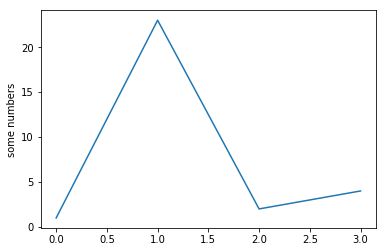

In [10]:
plt.plot([1, 23, 2, 4])
plt.ylabel('some numbers')
vis.matplot(plt)

In [183]:
vis.matplot(plt)
# Watch on Visdom server

'window_36b6d6df6b9cca'

<Figure size 432x288 with 0 Axes>

In [11]:
import scipy.stats as stats

In [12]:
X = np.arange(-10,10,0.05)


In [13]:
Y = stats.norm.pdf(X)


'window_36b745833057c4'

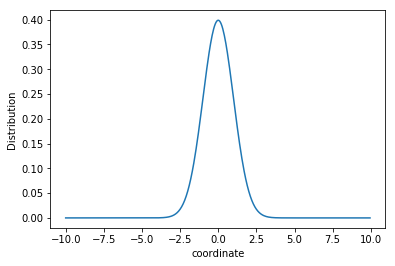

In [14]:
plt.plot(X,Y)
plt.ylabel('Distribution')
plt.xlabel("coordinate")
vis.matplot(plt)

In [15]:
# Image
vis.image(
        # Channels are first!
        np.random.rand(3, 512, 256),
        opts=dict(title='Random!', caption='How random.'),
    )

'window_36b7459a8d720a'

In [16]:
import matplotlib.image as mimage

In [17]:
img = mimage.imread('Lenna.png')

In [18]:
img.shape

(220, 220, 3)

In [19]:
vis.image(np.transpose(img, axes=[2,0,1,]),opts=dict(title='Lenna!', caption='pp'))

'window_36b745afb3e9ca'

In [20]:
Y = np.random.rand(100)
old_scatter = vis.scatter(
        X=np.random.rand(100, 2),
        Y=(Y[Y > 0] + 1.5).astype(int),
        opts=dict(
            legend=['Didnt', 'Update'],
            xtickmin=-50,
            xtickmax=50,
            xtickstep=0.5,
            ytickmin=-50,
            ytickmax=50,
            ytickstep=0.5,
            markersymbol='cross-thin-open',
        ),
    )

In [21]:
vis.update_window_opts(
        win=old_scatter,
        opts=dict(
            legend=['Apples', 'Pears'],
            xtickmin=0,
            xtickmax=1,
            xtickstep=0.5,
            ytickmin=0,
            ytickmax=1,
            ytickstep=0.5,
            markersymbol='cross-thin-open',
        ),
    )

'window_36b745cfd05bd8'

In [22]:
# 3d scatterplot with custom labels and ranges
vis.scatter(
        X=np.random.rand(100, 3),
        Y=(Y + 1.5).astype(int),
        opts=dict(
            legend=['Men', 'Women'],
            markersize=5,
            xtickmin=0,
            xtickmax=2,
            xlabel='Arbitrary',
            xtickvals=[0, 0.75, 1.6, 2],
            ytickmin=0,
            ytickmax=2,
            ytickstep=0.5,
            ztickmin=0,
            ztickmax=1,
            ztickstep=0.5,
        )
    )

'window_36b745f15d4e60'

In [23]:
# 2D scatterplot with custom intensities (red channel)
vis.scatter(
        X=np.random.rand(255, 2),
        Y=(np.random.rand(255) + 1.5).astype(int),
        opts=dict(
            markersize=10,
            markercolor=np.random.randint(0, 255, (2, 3,)),
        ),
    )

'window_36b74624f38c0e'

In [24]:
win = vis.scatter(
        X=np.random.rand(255, 2),
        opts=dict(
            markersize=10,
            markercolor=np.random.randint(0, 255, (255, 3,)),
        ),
    )

In [25]:
# add new trace to scatter plot
vis.scatter(
        X=np.random.rand(255),
        Y=np.random.rand(255),
        win=win,
        name='new_trace',
        update='new'
    )

'window_36b746264722a6'

In [26]:
# bar plots
vis.bar(X=np.random.rand(20))
vis.bar(
        X=np.abs(np.random.rand(5, 3)),
        opts=dict(
            stacked=True,
            legend=['Facebook', 'Google', 'Twitter'],
            rownames=['2012', '2013', '2014', '2015', '2016']
        )
    )

'window_36b74639422eea'

In [27]:
# line plots
vis.line(Y=np.random.rand(10), opts=dict(showlegend=True))


'window_36b7465983e296'

In [28]:
# line updates
win = vis.line(
        X=np.column_stack((np.arange(0, 10), np.arange(0, 10))),
        Y=np.column_stack((np.linspace(5, 10, 10),
                           np.linspace(5, 10, 10) + 5)),
    )

In [29]:
vis.line(
        X=np.column_stack((np.arange(10, 20), np.arange(10, 20))),
        Y=np.column_stack((np.linspace(5, 10, 10),
                           np.linspace(5, 10, 10) + 5)),
        win=win,
        update='append'
    )

'window_36b7465b53b3d4'

### Task: write scatter or line that will update each 5 seconds

In [30]:
import time
# Hint
# time.sleep(5)

In [31]:
#---Your code here---
win = vis.scatter(
        X=np.random.rand(255, 2),
        opts=dict(
            markersize=10,
            markercolor=np.random.randint(0, 255, (255, 3,)),
        ),
    )

In [32]:
for i in range(50):
    time.sleep(5)
    vis.scatter(
        X=np.random.rand(255),
        Y=np.random.rand(255),
        win=win,
        name='new_trace',
        update='new'
        #update='append'
    )

KeyboardInterrupt: 

**Google search: Visdom python examples.**

**For more, you can see documentation and sources.**

**Let's go closely to pytorch**

**TNT is a library providing powerful dataloading, logging and visualization utlities for Python. It is closely intergrated with PyTorch and is designed to enable rapid iteration with any model or training regimen.** https://tnt.readthedocs.io/en/latest/source/torchnet.logger.html

**Let's look at MNIST example firstly.**

In [34]:
from tqdm import tqdm
import torch
import torch.optim
import torchnet as tnt
from torch.autograd import Variable
import torch.nn.functional as F
from torch.nn.init import kaiming_normal
from torchnet.engine import Engine
from torchnet.logger import VisdomPlotLogger, VisdomLogger
from torchvision.datasets.mnist import MNIST

In [35]:
def get_iterator(mode):
    # Batch iterator.
    ds = MNIST(root='./', download=True, train=mode)
    data = getattr(ds, 'train_data' if mode else 'test_data')
    labels = getattr(ds, 'train_labels' if mode else 'test_labels')
    tds = tnt.dataset.TensorDataset([data, labels])
    return tds.parallel(batch_size=50, num_workers=4, shuffle=mode)


def conv_init(chanels_in, chanels_out, filter_size):
    # Sample from norm(0, std) with complex std.
    return kaiming_normal(torch.Tensor(chanels_out, chanels_in, filter_size, filter_size))


def linear_init(chanels_in, chanels_out):
    return kaiming_normal(torch.Tensor(chanels_out, chanels_in))

**We will define dictionary params with neural network parameters to use them with TNT**

**Question: Do you know what is the difference between static and dynamic graphs (Difference between Tensorflow and Pytorch) ?**

In [36]:
def forward(params, inputs, mode):
    # We will use torch functional API
    # Batch, channel, H,W
    inp = inputs.view(inputs.size(0), 1, 28, 28)
    conv0 = F.conv2d(inp, params['conv0.weight'], params['conv0.bias'], stride=2)
    conv0 = F.relu(conv0)
    conv1 = F.conv2d(conv0, params['conv1.weight'], params['conv1.bias'], stride=2)
    conv1 = F.relu(conv1)
    flat = conv1.view(conv1.size(0), -1)
    dense1 = F.linear(flat, params['linear2.weight'], params['linear2.bias'])
    dense1 = F.relu(dense1)
    out = F.linear(dense1, params['linear3.weight'], params['linear3.bias'])
    return out

In [37]:
# Let's make parameters dictionary.
params = {
        'conv0.weight': conv_init(1, 50, 5), 'conv0.bias': torch.zeros(50),
        'conv1.weight': conv_init(50, 50, 5), 'conv1.bias': torch.zeros(50),
        'linear2.weight': linear_init(800, 512), 'linear2.bias': torch.zeros(512),
        'linear3.weight': linear_init(512, 10), 'linear3.bias': torch.zeros(10),
    }

/home/vprov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning:

nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.

/home/vprov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning:

nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.



In [38]:
# Now we should make a dict from parameter name to the Variable that is required_grad
params = {k: Variable(v, requires_grad=True) for k, v in params.items()}

In [39]:
optimizer = torch.optim.SGD(
    params.values(), lr=0.01, momentum=0.9, weight_decay=0.0005)

In [40]:
# Let's define our loggers.
engine = Engine()
# Meters for metrics
classerr = tnt.meter.ClassErrorMeter(accuracy=True)
meter_loss = tnt.meter.AverageValueMeter()
confusion_meter = tnt.meter.ConfusionMeter(10, normalized=True)

port = 8097
train_loss_logger = VisdomPlotLogger(
        'line', port=port, opts={'title': 'Train Loss'})
train_err_logger = VisdomPlotLogger(
        'line', port=port, opts={'title': 'Train Class Error'})
test_loss_logger = VisdomPlotLogger(
        'line', port=port, opts={'title': 'Test Loss'})
test_err_logger = VisdomPlotLogger(
        'line', port=port, opts={'title': 'Test Class Error'})
confusion_logger = VisdomLogger('heatmap', port=port, opts={'title': 'Confusion matrix',
                                                                'columnnames': list(range(10)),
                                                                'rownames': list(range(10))})

In [41]:
from tqdm import tqdm_notebook

In [42]:
# Training
def h(sample):
    # scaling
    inputs = Variable(sample[0].float() / 255.0)
    targets = Variable(torch.LongTensor(sample[1]))
    out = forward(params, inputs, sample[2])
    return F.cross_entropy(out, targets), out

def reset_meters():
    classerr.reset()
    meter_loss.reset()
    confusion_meter.reset()

def on_sample(state):
    state['sample'].append(state['train'])

def on_forward(state):
    classerr.add(state['output'].data,
                 torch.LongTensor(state['sample'][1]))
    confusion_meter.add(state['output'].data,
                        torch.LongTensor(state['sample'][1]))
    meter_loss.add(state['loss'].data[0])

def on_start_epoch(state):
    reset_meters()
    state['iterator'] = tqdm_notebook(state['iterator'])

def on_end_epoch(state):
    print('Training loss: %.4f, accuracy: %.2f%%' % (meter_loss.value()[0], classerr.value()[0]))
    train_loss_logger.log(state['epoch'], meter_loss.value()[0])
    train_err_logger.log(state['epoch'], classerr.value()[0])

    # do validation at the end of each epoch
    reset_meters()
    engine.test(h, get_iterator(False))
    test_loss_logger.log(state['epoch'], meter_loss.value()[0])
    test_err_logger.log(state['epoch'], classerr.value()[0])
    confusion_logger.log(confusion_meter.value())
    print('Testing loss: %.4f, accuracy: %.2f%%' % (meter_loss.value()[0], classerr.value()[0]))

engine.hooks['on_sample'] = on_sample
engine.hooks['on_forward'] = on_forward
engine.hooks['on_start_epoch'] = on_start_epoch
engine.hooks['on_end_epoch'] = on_end_epoch
engine.train(h, get_iterator(True), maxepoch=5, optimizer=optimizer)

/home/vprov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning:

invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number




Training loss: 0.1784, accuracy: 94.54%
Testing loss: 0.0714, accuracy: 97.74%



Training loss: 0.0631, accuracy: 98.08%
Testing loss: 0.0491, accuracy: 98.43%



Training loss: 0.0425, accuracy: 98.68%
Testing loss: 0.0466, accuracy: 98.52%



Training loss: 0.0330, accuracy: 98.98%
Testing loss: 0.0371, accuracy: 98.80%


Process Process-36:
Process Process-35:
Process Process-34:
Process Process-33:
Traceback (most recent call last):
  File "/home/vprov/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/vprov/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/vprov/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/vprov/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vprov/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/vprov/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/vprov/anaconda3/lib/python3.6/multiprocessing/pr

KeyboardInterrupt: 

In [43]:
torch.mean(params['conv0.weight'])

tensor(0.0091, grad_fn=<MeanBackward1>)

In [44]:
X=torch.zeros((1,)).cpu()

In [45]:
mean_win = vis.line(X=torch.zeros((1,)).cpu(),
                           Y=torch.zeros((1)).cpu(),
                           opts=dict(xlabel='iter',
                                     ylabel='Mean',
                                     title='Mean',
                                     legend=['Mean']))

In [47]:
vis.line(
    X=torch.zeros((1,)).cpu(),
    Y=torch.reshape(torch.mean(params['conv0.weight']).cpu(), (1,)),
    win=mean_win,
    update='append'
)

'window_36b74a2a5c2f5c'

**Hmm, do we think the same way?**

In [48]:
from torchvision import datasets, transforms

In [49]:
train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=120, shuffle=True)

In [50]:
test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
    batch_size=120, shuffle=True)

In [52]:
NUM_ITERS = 10
for epoch in range(1, NUM_ITERS + 1):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = forward(params, data, False)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 50== 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            X += 1
            vis.line(
            X=X,
            Y=torch.reshape(torch.mean(params['conv0.weight']).cpu(), (1,)),
            win=mean_win,
            update='append'
            )

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.010567
Train Epoch: 1 [6000/60000 (10%)]	Loss: 0.013591
Train Epoch: 1 [12000/60000 (20%)]	Loss: 0.006265
Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.007906
Train Epoch: 1 [24000/60000 (40%)]	Loss: 0.066842
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.038837
Train Epoch: 1 [36000/60000 (60%)]	Loss: 0.015487
Train Epoch: 1 [42000/60000 (70%)]	Loss: 0.007428
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.034946
Train Epoch: 1 [54000/60000 (90%)]	Loss: 0.015514
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.004063
Train Epoch: 2 [6000/60000 (10%)]	Loss: 0.010098
Train Epoch: 2 [12000/60000 (20%)]	Loss: 0.003092
Train Epoch: 2 [18000/60000 (30%)]	Loss: 0.003246
Train Epoch: 2 [24000/60000 (40%)]	Loss: 0.015180
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.006766
Train Epoch: 2 [36000/60000 (60%)]	Loss: 0.003113
Train Epoch: 2 [42000/60000 (70%)]	Loss: 0.009396
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.008904
Train Epoch: 2 [54000/60000 (90%)]	Loss: 0.002354
Train Epoch:

KeyboardInterrupt: 

**Hometask: Do some experiments with any DeepLearning architecture and Visdom. Show some statistics and results on the next class or in the chat. You can send your work to the email: iv.provilkov@gmail.com, with tag DLHW.**

Thanks to the authors of tutorials.